In [5]:
# CTRL SHIFT P > create environment 
# raccourci pour créer un venv

In [83]:
#pip install pandas

## Import des données et des librairies

In [84]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import *
dataframe = pd.read_csv("data.csv")

## ANALYSE UNIVARIEE

### Dimensions du dataframe

In [8]:
# DATAFRAME ORIGINAL    
dataframe.shape

(1338, 7)

In [9]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Recherche de valeurs NaN

In [11]:
dataframe.isnull().describe()

,age,sex,bmi,children,smoker,region,charges
count,1338,1338,1338,1338,1338,1338,1338
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,1338,1338,1338,1338,1338,1338,1338


### Doublons

In [79]:
duplicates = dataframe[dataframe.duplicated(keep=False)]
print(duplicates)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [80]:
index_to_remove = 581
dataframe = dataframe.drop(index_to_remove)
dataframe = dataframe.reset_index(drop=True)
print(dataframe.shape)

(1337, 7)


### Valeurs abérrantes et Boxplot

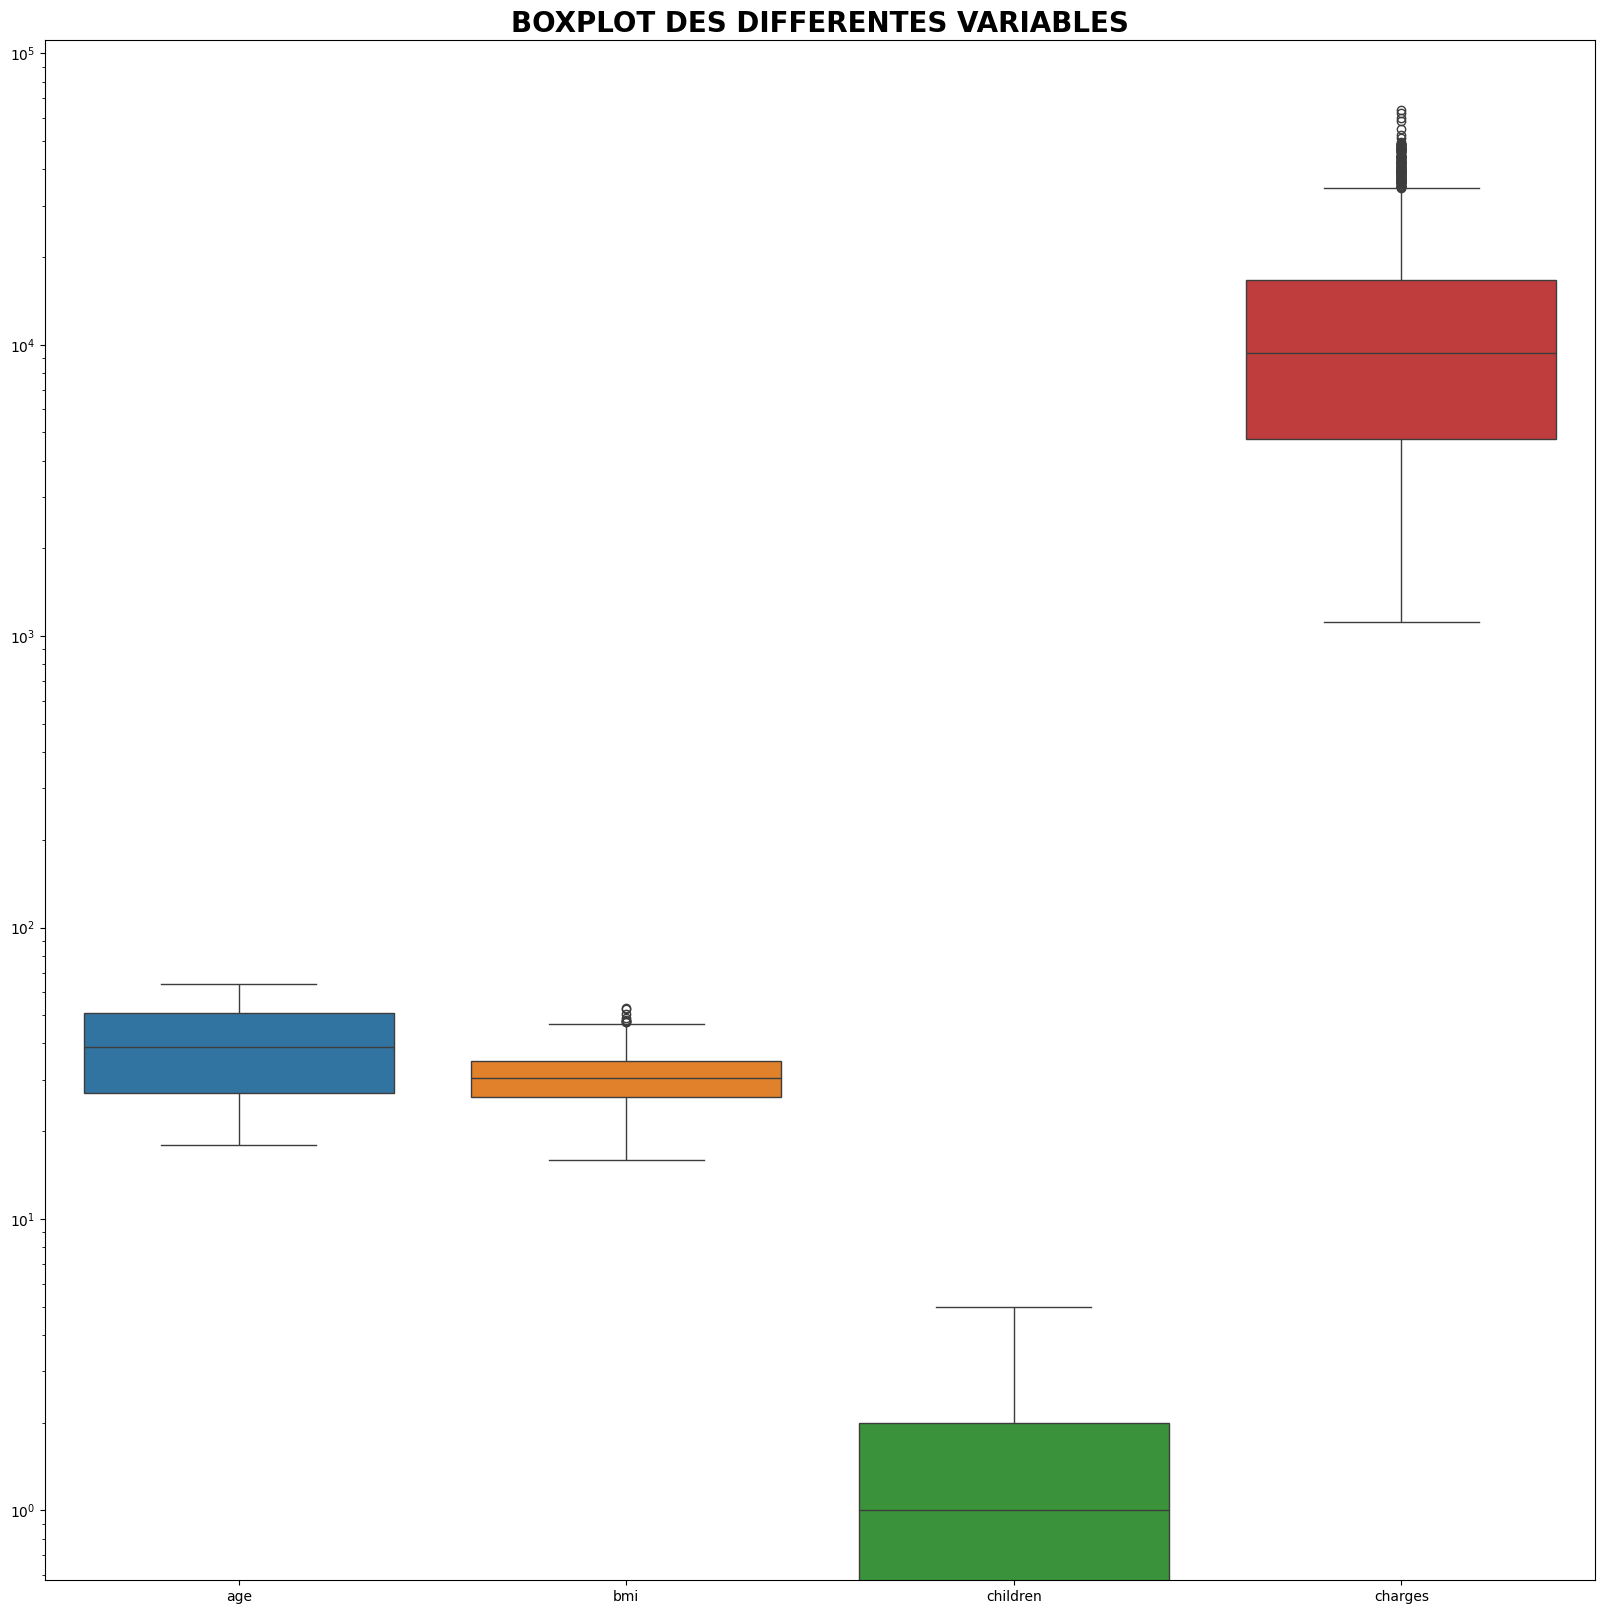

In [12]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dataframe)
plt.yscale("log")

plt.title("BOXPLOT DES DIFFERENTES VARIABLES", fontsize=20, weight="bold")
plt.show()

### variable AGE

In [13]:
dataframe["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [86]:
# Calculate the z-score for each variable
z = np.abs(stats.zscore(dataframe['age']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = dataframe[z > threshold]

# Print the outliers
print(outliers)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


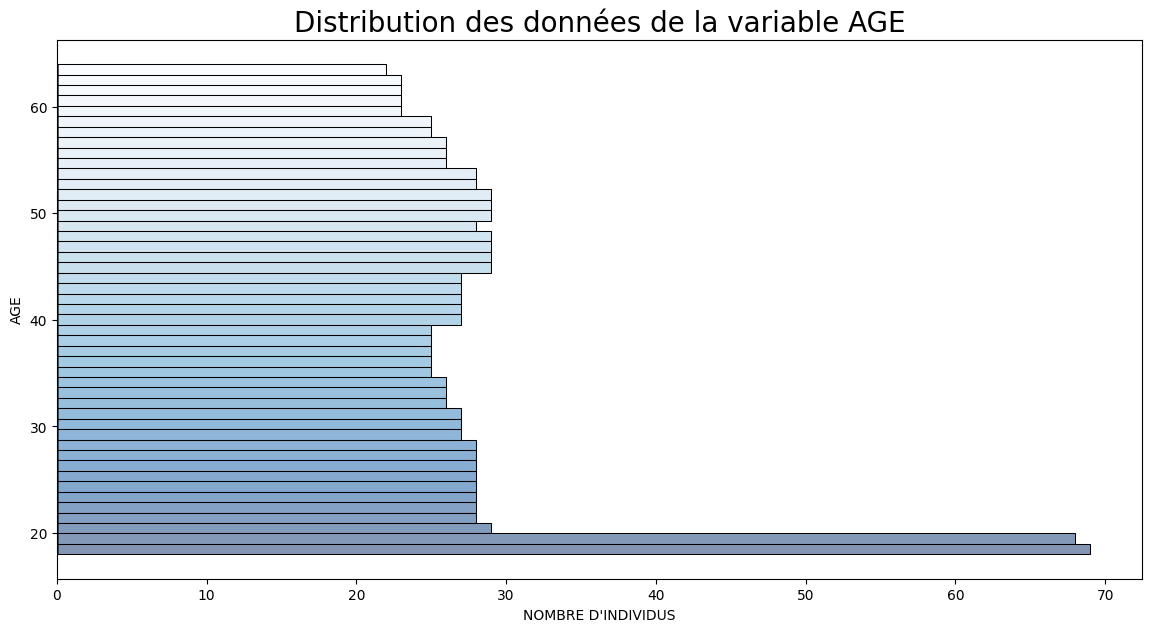

In [16]:
bins = 47
plt.figure(figsize=(14,7))
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("AGE")
plt.title("Distribution des données de la variable AGE", fontsize=20)
sns.histplot(dataframe, y="age", bins=bins, hue="age", palette="Blues_r", legend=False)
plt.show()

### variable SEX

In [17]:
dataframe["sex"].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [18]:
hommes = dataframe["sex"] == "male"
nb_hommes = dataframe[hommes]["sex"].count()
nb_femmes = dataframe[~hommes]["sex"].count()
print(f"Total clients : {nb_hommes+nb_femmes}")
print(f"Nombre total d'hommes : {nb_hommes}")
print(f"Nombre total de femmes : {nb_femmes}")

Total clients : 1338
Nombre total d'hommes : 676
Nombre total de femmes : 662


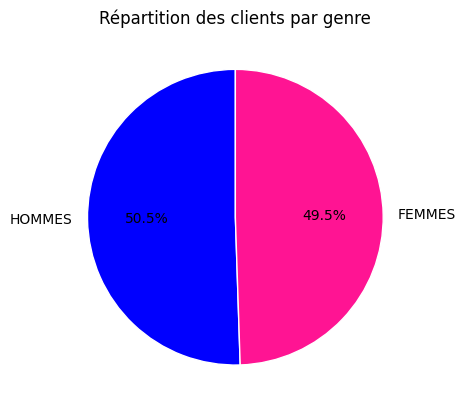

In [56]:
counts = dataframe['sex'].value_counts()
labels = ["HOMMES", "FEMMES"]
colors = ["blue", "deeppink"]

plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des clients par genre')
plt.show()

### variable BMI : Indice de masse corporel

In [19]:
dataframe["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [85]:
# Calculate the z-score for each variable
z = np.abs(stats.zscore(dataframe['bmi']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = dataframe[z > threshold]

# Print the outliers
print(outliers)

      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627


In [102]:
# Création de la nouvelle colonne 'bmi_categories' en utilisant la méthode apply
dataframe['bmi_index'] = dataframe['bmi'].apply(lambda x: 0 if x < 18.5 else (1 if 18.5 <= x <= 24.9 else (2 if 25.0 <= x <= 29.9 else (3 if 30.0 <= x <= 34.9 else (4 if 35.0 <= x <= 39.9 else 5)))))
dataframe['bmi_categories'] = dataframe['bmi_index'].apply(lambda x: "underweight" if x == 0 else ("normal" if x == 1 else ("overweight" if x == 2 else ("obesity class 1" if x == 3 else ("obesity class 2" if x == 4 else ("obesity class 3" if x == 5 else 6))))))
dataframe["bmi_categories"].value_counts()

bmi_categories
obesity class 1    388
overweight         377
obesity class 2    223
normal             222
obesity class 3    108
underweight         20
Name: count, dtype: int64

### variable CHILDREN

In [20]:
dataframe["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [21]:
dataframe["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

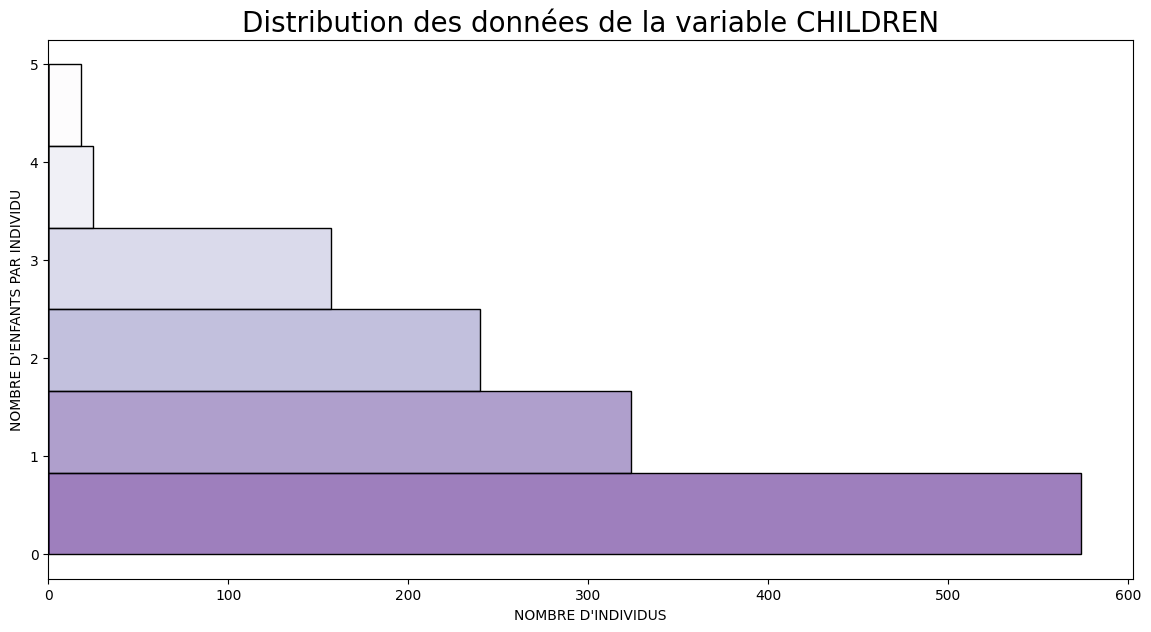

In [22]:
bins = len(dataframe["children"].value_counts())
plt.figure(figsize=(14,7))
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("NOMBRE D'ENFANTS PAR INDIVIDU")
plt.title("Distribution des données de la variable CHILDREN", fontsize=20)
sns.histplot(dataframe, y="children", bins=bins, hue="children", palette="Purples_r", legend=False)
plt.show()

In [89]:
# Calculate the z-score for each variable
z = np.abs(stats.zscore(dataframe['children']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = dataframe[z > threshold]

# Print the outliers
print(outliers)

      age     sex     bmi  children smoker     region      charges
32     19  female  28.600         5     no  southwest   4687.79700
71     31    male  28.500         5     no  northeast   6799.45800
166    20  female  37.000         5     no  southwest   4830.63000
413    25    male  23.900         5     no  southwest   5080.09600
425    45    male  24.310         5     no  southeast   9788.86590
438    52  female  46.750         5     no  southeast  12592.53450
568    49  female  31.900         5     no  southwest  11552.90400
640    33    male  42.400         5     no  southwest   6666.24300
877    33    male  33.440         5     no  southeast   6653.78860
932    46    male  25.800         5     no  southwest  10096.97000
937    39  female  24.225         5     no  northwest   8965.79575
969    39  female  34.320         5     no  southeast   8596.82780
984    20    male  30.115         5     no  northeast   4915.05985
1085   39  female  18.300         5    yes  southwest  19023.2

### variable SMOKER

In [23]:
dataframe["smoker"].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

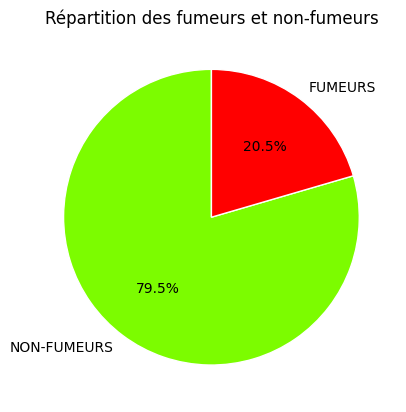

In [57]:
counts = dataframe['smoker'].value_counts()
labels = ["NON-FUMEURS", "FUMEURS"]
colors = ["lawngreen", "red"]

plt.pie(counts, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des fumeurs et non-fumeurs')
plt.show()

In [67]:
# TRANSFORMATION DES VALEURS "YES" ET "NO" EN 0 ET 1
dataframe["smoker"] = dataframe["smoker"].replace({"no": 0, "yes" : 1})
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


### variable REGION

In [25]:
dataframe["region"].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

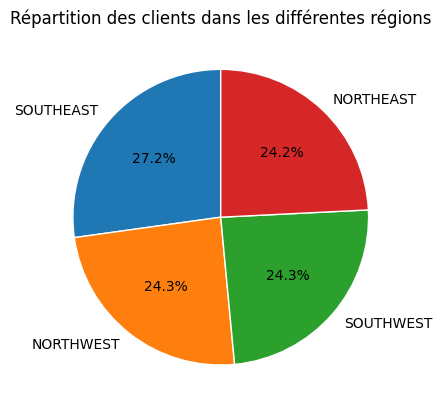

In [58]:
region_counts = dataframe['region'].value_counts()
labels = ["SOUTHEAST", "NORTHWEST","SOUTHWEST", "NORTHEAST" ]
colors = [""]

plt.pie(region_counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Répartition des clients dans les différentes régions')
plt.show()

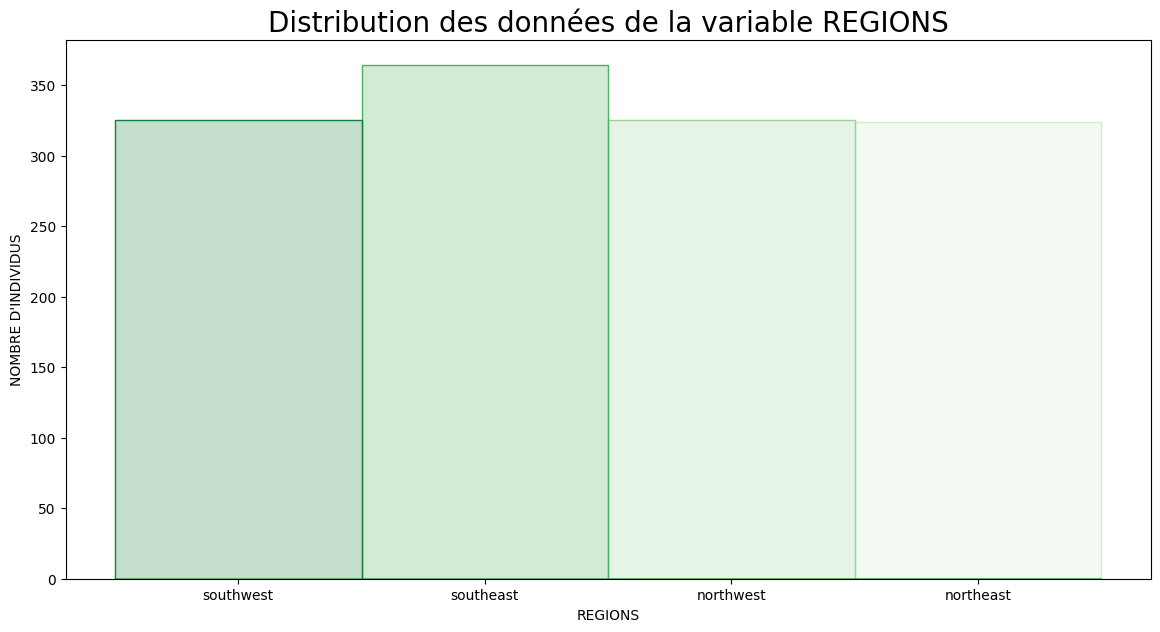

In [70]:
plt.figure(figsize=(14,7))
plt.ylabel("NOMBRE D'INDIVIDUS")
plt.xlabel("REGIONS")
plt.title("Distribution des données de la variable REGIONS", fontsize=20)
sns.histplot(dataframe, x="region", hue="region", palette="Greens_r", legend=False, binwidth=5, element="step")
plt.show()

### variable CHARGES

In [30]:
dataframe["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [87]:
# Calculate the z-score for each variable
z = np.abs(stats.zscore(dataframe['charges']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = dataframe[z > threshold]

# Print the outliers
print(outliers)

      age     sex     bmi  children smoker     region      charges
34     28    male  36.400         1    yes  southwest  51194.55914
543    54  female  47.410         0    yes  southeast  63770.42801
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209
1146   60    male  32.800         0    yes  southwest  52590.82939
1230   52    male  34.485         3    yes  northwest  60021.39897
1300   45    male  30.360         0    yes  southeast  62592.87309


## ANALYSE BIVARIEE

### PAIRPLOTS PAR SEX

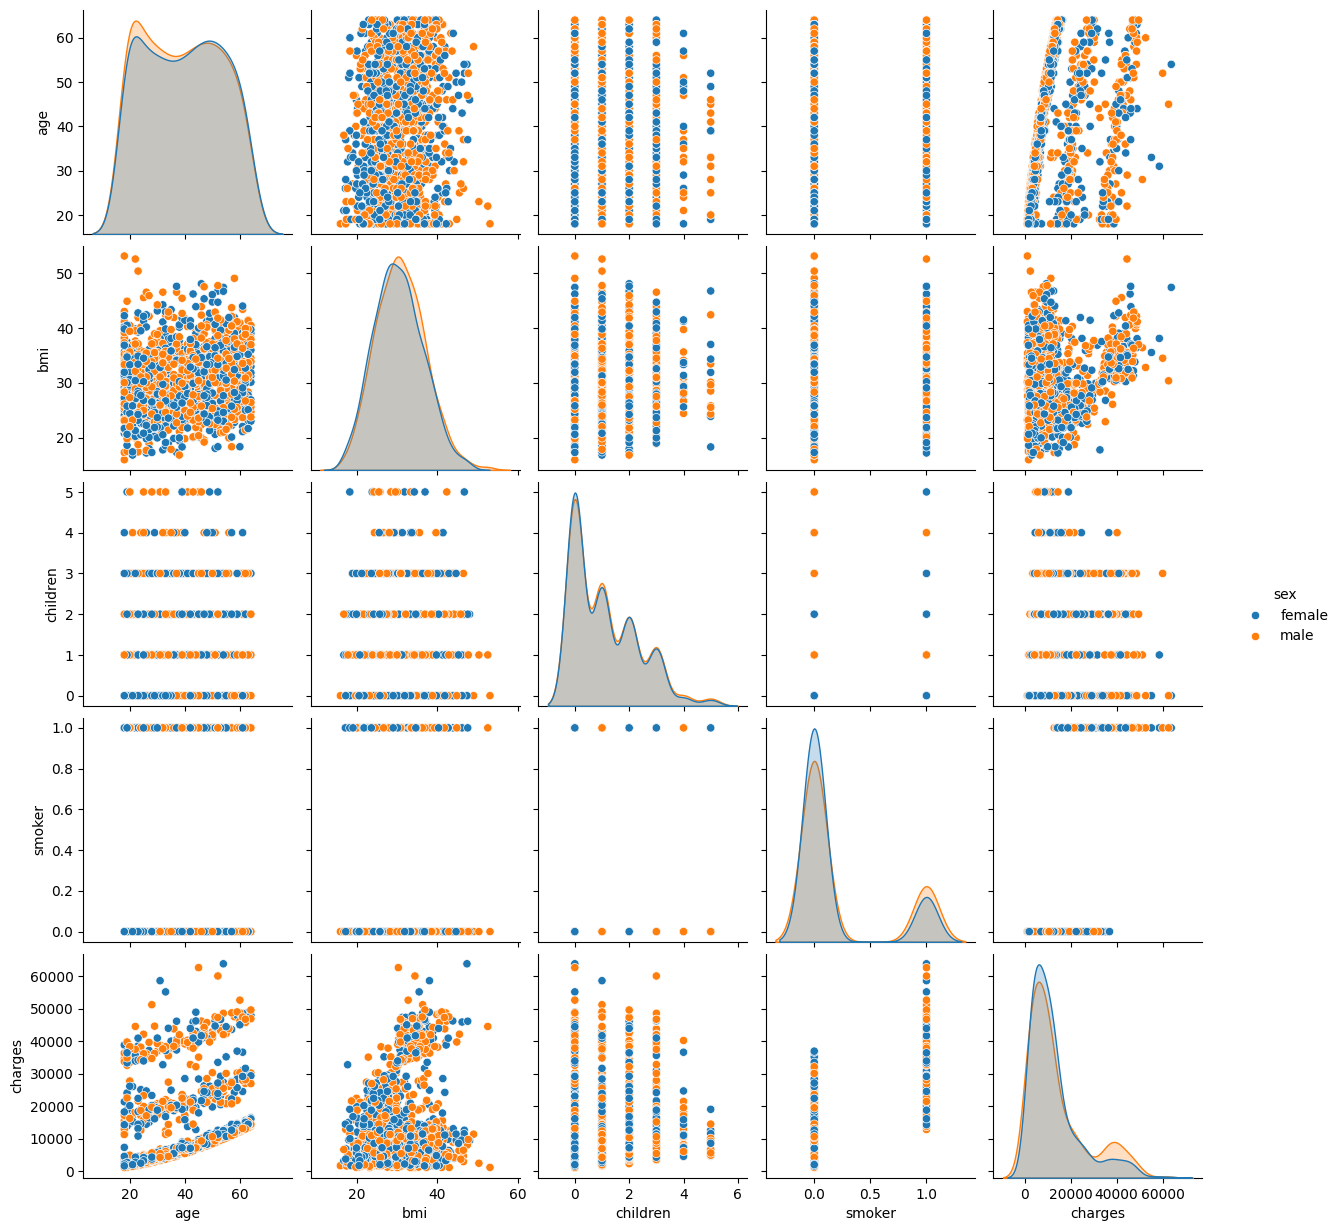

In [74]:
sns.pairplot(dataframe, hue="sex")

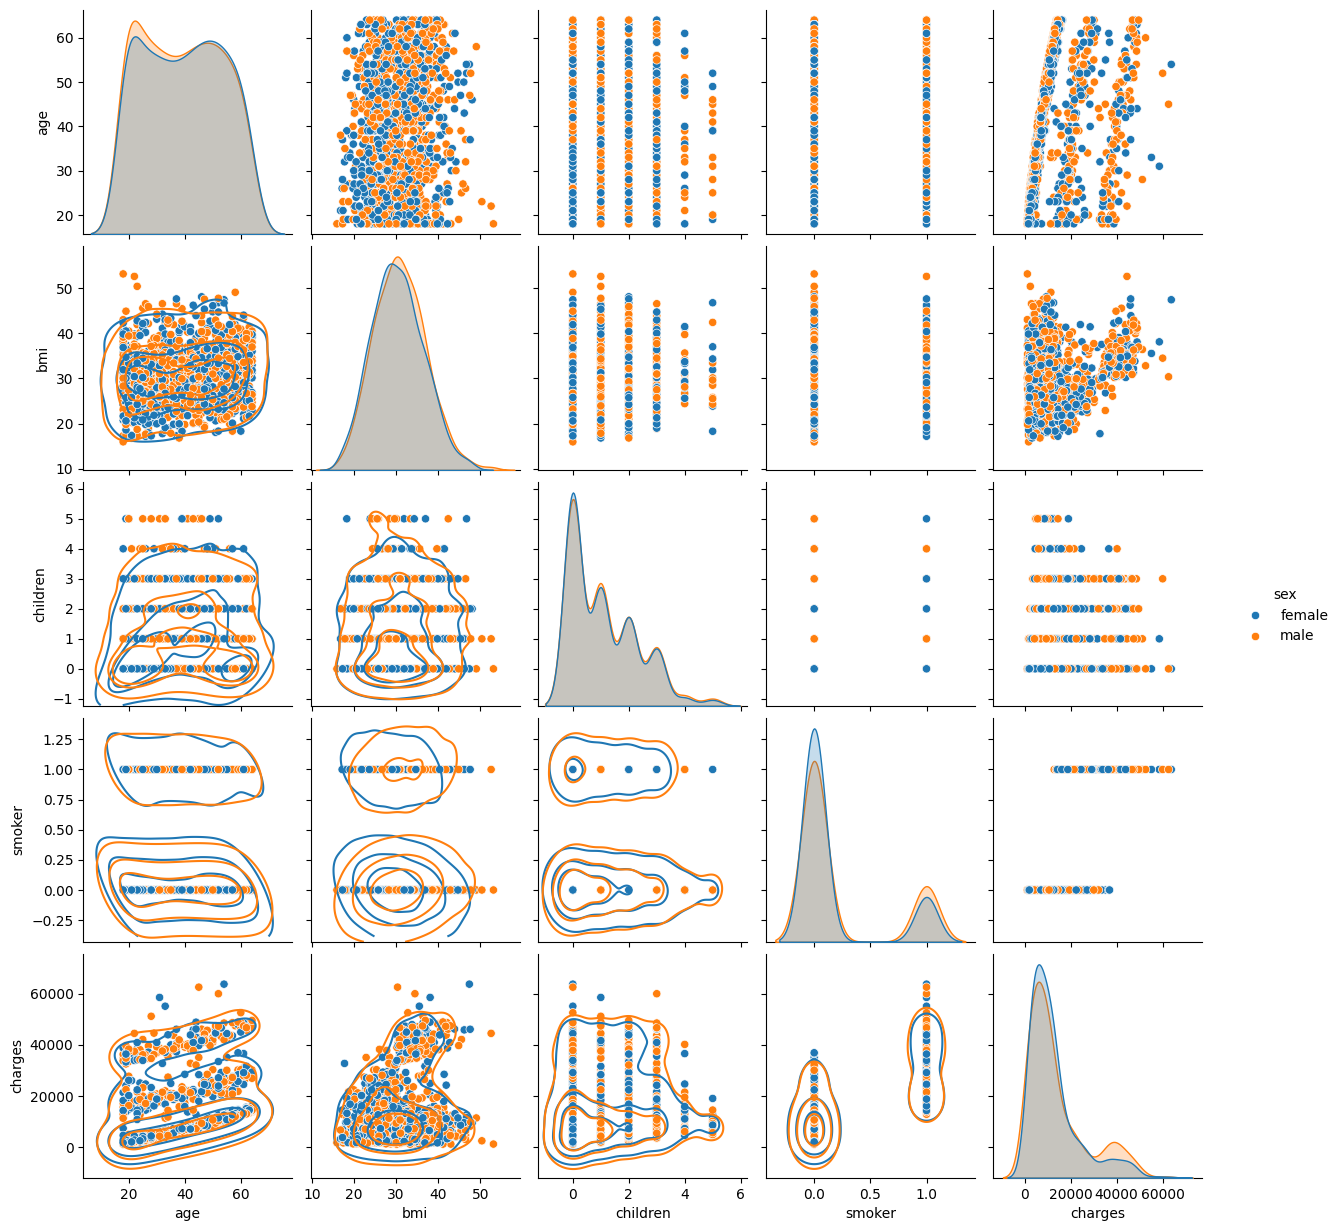

In [76]:
g = sns.pairplot(dataframe, diag_kind="kde", hue="sex")
g.map_lower(sns.kdeplot, levels=4, color=".2")

### PAIRPLOTS PAR BMI GROUP